In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv("../data/ventes.csv", parse_dates=["Date"])

# Aperçu des données
print(df.shape)
df.head()


(1000, 7)


,Date,Produit,Catégorie,Client_ID,Quantité,Prix_Unitaire,Moyen_Paiement
0,2024-05-11,"TV LG 42""",Électronique,C0039,5,350000,Carte bancaire
1,2024-03-18,Casque JBL,Accessoires,C0095,1,20000,Mobile Money
2,2024-03-01,Chaussures Nike,Mode,C0074,5,45000,Mobile Money
3,2024-11-24,Casque JBL,Accessoires,C0099,5,20000,Cash
4,2024-07-30,Sac à dos Puma,Mode,C0023,3,25000,Mobile Money


In [2]:
# Statistiques descriptives
df.describe(include="all")

# Vérifier les valeurs manquantes
df.isnull().sum()


Date              0
Produit           0
Catégorie         0
Client_ID         0
Quantité          0
Prix_Unitaire     0
Moyen_Paiement    0
dtype: int64

In [3]:
# Chiffre d'affaires total
df["CA"] = df["Quantité"] * df["Prix_Unitaire"]
ca_total = df["CA"].sum()
print(f"Chiffre d'affaires total : {ca_total:,.0f} FCFA")

# Panier moyen
panier_moyen = df["CA"].mean()
print(f"Panier moyen : {panier_moyen:,.0f} FCFA")

# Produits les plus vendus (en quantité)
produits_top = df.groupby("Produit")["Quantité"].sum().sort_values(ascending=False)
print(produits_top.head())

# Clients les plus actifs (en CA)
clients_top = df.groupby("Client_ID")["CA"].sum().sort_values(ascending=False)
print(clients_top.head())


Chiffre d'affaires total : 351,103,000 FCFA
Panier moyen : 351,103 FCFA
Produit
TV LG 42"           361
Sac à dos Puma      355
Chaussures Nike     351
Casque JBL          340
Clavier Logitech    339
Name: Quantité, dtype: int64
Client_ID
C0006    8962000
C0045    8828000
C0039    8055000
C0076    8027000
C0057    6266000
Name: CA, dtype: int64


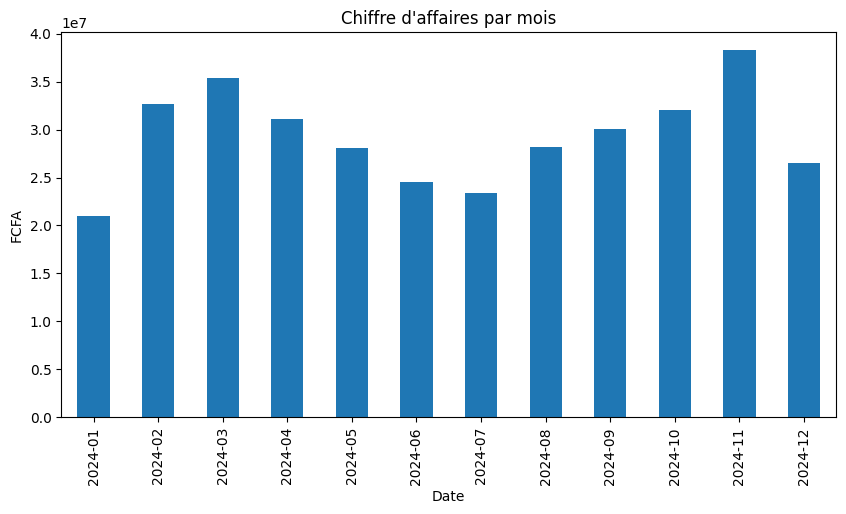

In [5]:
plt.figure(figsize=(10,5))
df.groupby(df["Date"].dt.to_period("M"))["CA"].sum().plot(kind="bar")
plt.title("Chiffre d'affaires par mois")
plt.ylabel("FCFA")
plt.show()


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Connexion
engine = create_engine("sqlite:///../data/ventes.db")

# Lire la table
df_sql = pd.read_sql("SELECT * FROM ventes LIMIT 5", engine)
df_sql


,Date,Produit,Catégorie,Client_ID,Quantité,Prix_Unitaire,Moyen_Paiement,CA
0,2024-05-11 00:00:00.000000,"TV LG 42""",Électronique,C0039,5,350000,Carte bancaire,1750000
1,2024-03-18 00:00:00.000000,Casque JBL,Accessoires,C0095,1,20000,Mobile Money,20000
2,2024-03-01 00:00:00.000000,Chaussures Nike,Mode,C0074,5,45000,Mobile Money,225000
3,2024-11-24 00:00:00.000000,Casque JBL,Accessoires,C0099,5,20000,Cash,100000
4,2024-07-30 00:00:00.000000,Sac à dos Puma,Mode,C0023,3,25000,Mobile Money,75000


In [10]:
# Chiffre d'affaires total
pd.read_sql("SELECT SUM(CA) AS CA_total FROM ventes", engine)

# Produits les plus vendus
pd.read_sql("""
SELECT Produit, SUM(Quantité) AS total_qte
FROM ventes
GROUP BY Produit
ORDER BY total_qte DESC
LIMIT 5
""", engine)

,Produit,total_qte
0,"TV LG 42""",361
1,Sac à dos Puma,355
2,Chaussures Nike,351
3,Casque JBL,340
4,Clavier Logitech,339
